In [1]:
# import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 使用tensorflow1.x版本
import tensorflow.compat.v1 as tf


In [2]:
# # 使得在网页中能够显示图标, 在vscode中不需要进行设置
# # %matplotlib inline

# # 使用tensorboard
# %load_ext tensorboard
# # 加载tensorboard并使用其做可视化
# %tensorboard --logdir logs

# # %reload_ext tensorboard

In [3]:
# 设置随机种子
np.random.seed(5)

In [4]:
# 禁用eager模式
tf.disable_eager_execution()

In [5]:
x_data = np.linspace(0,1,500)

y_data = 3.1234 * x_data + 2.98 + np.random.randn(*x_data.shape) * 0.4

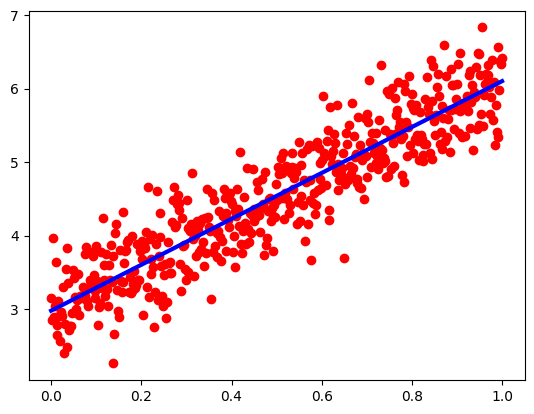

In [6]:
# 绘制散点图
plt.scatter(x_data, y_data, color='red')

# 绘制直线图
plt.plot(x_data,3.1234 * x_data + 2.98,color = 'blue', linewidth = 3)

In [7]:
# 定义变量，但是不给变量赋初值
# tensorflow2.x中没有该操作
x = tf.placeholder("float", name="y")
y = tf.placeholder("float", name="y")

In [8]:
def model(x,w,b):
    return tf.multiply(x,w) + b

In [9]:
w = tf.Variable(1.0, name='w0')
b = tf.Variable(0.0, name='b0')

pred = model(x, w, b)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
train_epochs = 10
learning_rate = 0.05

In [11]:
loss_function = tf.reduce_mean(tf.square(y - pred))

In [12]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)


In [13]:
sess = tf.Session()

init = tf.global_variables_initializer()

sess.run(init)

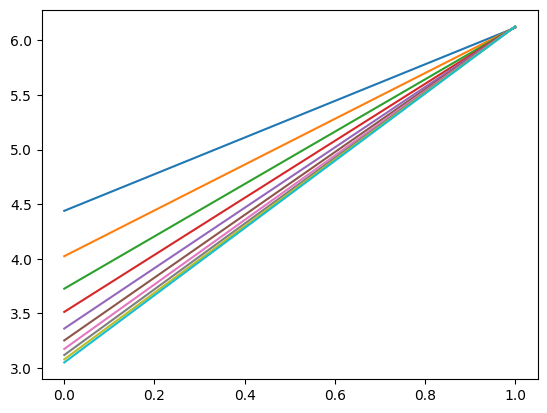

In [14]:
for epoch in range(train_epochs):
    for xs,ys in zip(x_data, y_data):
        _, loss = sess.run([optimizer, loss_function], feed_dict={x: xs, y: ys})
    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    plt.plot(x_data, w0temp * x_data + b0temp)

In [15]:
print("w: {}".format(sess.run(w)))
print("b: {}".format(sess.run(b)))

w: 3.0755410194396973
b: 3.051513910293579


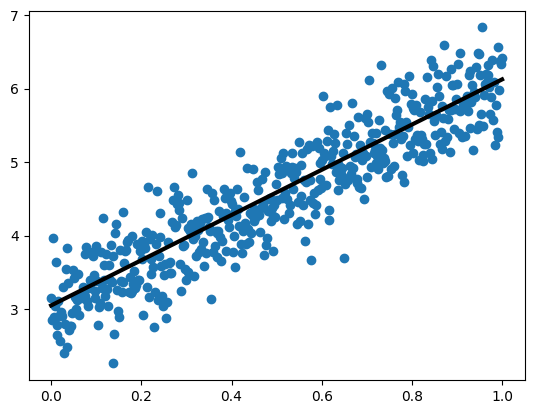

In [16]:
plt.scatter(x_data, y_data, label='Original data')
plt.plot(x_data, x_data * sess.run(w) + sess.run(b), label='Fitted line', color='black', linewidth='3')

In [17]:
x_test = 5.79
predict = sess.run(pred, feed_dict={x: x_test})
print("预测值:%f" % (predict))

target = 3.1234 * x_test + 2.98
print('目标值：%f' % (target))

预测值:20.858896
目标值：21.064486


In [18]:
writer=tf.summary.FileWriter(r"D:TensorBoardData", tf.get_default_graph())
writer.close()


<img src= "计算图.png">